

# Linear Regression

## Predicting Insurance Cost

In order for an insurance company to make money, it needs to collect more in yearly premiums than it spends on medical care to its beneficiaries. As a result, insurers invest a great deal of time and money to develop models that accurately forecast medical expenses.

The goal of this notebook is to use patient data (i.e. *age, sex, bmi, children, smoker, region*) to estimate the average medical care
expenses. These estimates could be used to create
actuarial tables which set the price of yearly premiums higher or lower depending
on the expected treatment costs.

Source: https://github.com/stedy/Machine-Learning-with-R-datasets

Dataset: https://raw.githubusercontent.com/iamsharduld/DSC207Datasets/main/Week7-8/insurance.csv

### Importing Python libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

### Accessing dataset

In [69]:
url = " https://raw.githubusercontent.com/mojuan010-hithub/linear_regression_insurance/refs/heads/main/insurance%20(1).csv"
df = pd.read_csv(url)
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [70]:
df.shape

(1338, 7)

In [71]:
df.isnull().value_counts()

,,,,,,,count
age,sex,bmi,children,smoker,region,charges,
False,False,False,False,False,False,False,1338


### Data Visualization

#### 1. Get statstical and datatype information for the fetched dataframe

We can see that age, bmi, and children are numeric variables and sex, smoker, and region are categorical variables

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [73]:
df.sex.value_counts()

,count
sex,
male,676
female,662


In [74]:
df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [75]:
df.region.value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


#### 2. Plot Distribution of Charges


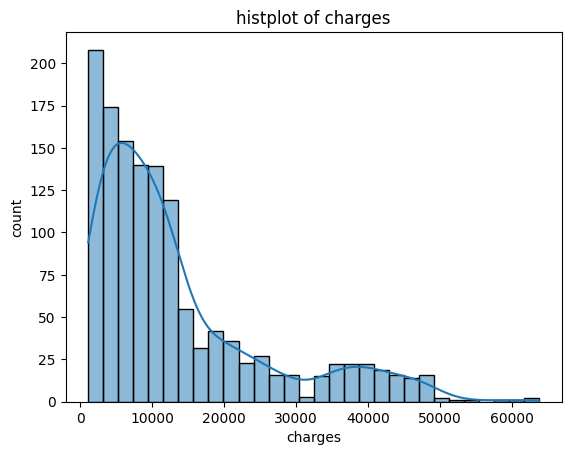

In [76]:
plt.subplot()
sns.histplot(data=df.charges,kde=True)
plt.title("histplot of charges")
plt.xlabel("charges")
plt.ylabel("count")
plt.show()

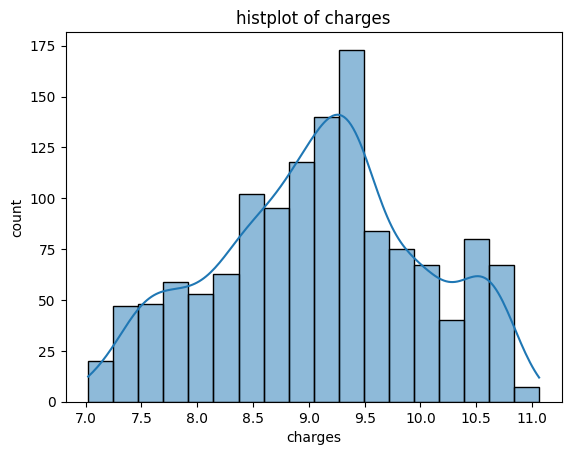

In [77]:
df_charges_log = np.log(df.charges)
plt.subplot()
sns.histplot(data=df_charges_log,kde=True)
plt.title("histplot of charges")
plt.xlabel("charges")
plt.ylabel("count")
plt.show()

#### 2. Visualize and compare how charges differentiate between smokers and non-smokers for male vs female.

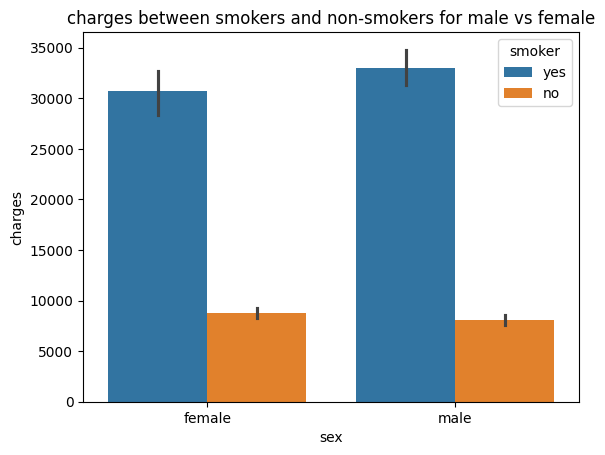

In [78]:
plt.subplot()
sns.barplot(data=df,x="sex",y="charges",hue="smoker")
plt.title("charges between smokers and non-smokers for male vs female")
plt.show()

### Predicting charges

#### Preprocessing

##### 1. Transform the categorical variables into numeric datatypes

In [79]:
OHE = OneHotEncoder(sparse_output=False)

In [80]:
df[["sex","smoker","region"]]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [81]:
sex_smoker_ohe = OHE.fit_transform(df[["sex","smoker","region"]])

In [82]:
pd_ohe_features = pd.DataFrame(data=sex_smoker_ohe,columns = OHE.get_feature_names_out(["sex","smoker","region"]))

In [83]:
pd_ohe_features

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [84]:
df = pd.concat([df,pd_ohe_features],axis=1).drop(columns = ["sex","region","smoker"])
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [85]:
X = df.drop(columns="charges")
X.head(5)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [86]:
y_log = np.log(df.charges)
y_log.head(5)

,charges
0,9.734176
1,7.453302
2,8.400538
3,9.998092
4,8.260197


##### 3. Split the data into train and test for model training and testing. Keep 20% for testing and rest for training

In [87]:
X_train,X_test,y_log_train,y_log_test = train_test_split(X,y_log,test_size=0.2)
print("features training size:",X_train.shape)
print("features testing size:",X_test.shape)
print("target training size:",y_log_train.shape)
print("target testing size:",y_log_test.shape)

features training size: (1070, 11)
features testing size: (268, 11)
target training size: (1070,)
target testing size: (268,)


##### 4. Using libraries imported above, create a Linear Regression model (Fit on training data)

In [88]:
lr = LinearRegression()
lr

LinearRegression()

In [89]:
lr.fit(X_train,y_log_train)

LinearRegression()

In [90]:
prediction_log_train = lr.predict(X_train)
prediction_log_train.shape

(1070,)

In [91]:
prediction_log_test = lr.predict(X_test)
prediction_log_test.shape

(268,)

### Coefficient & Intercept Calculation

In [92]:
lr.coef_

array([ 0.0348642 ,  0.01444445,  0.10723871,  0.05490159, -0.05490159,
       -0.79654651,  0.79654651,  0.09223793,  0.04290292, -0.08795624,
       -0.04718461])

In [93]:
X.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [94]:
pd.DataFrame(data=lr.coef_,columns=["coefficients"],index=X.columns).sort_values(by="coefficients")

,coefficients
smoker_no,-0.796547
region_southeast,-0.087956
sex_male,-0.054902
region_southwest,-0.047185
bmi,0.014444
age,0.034864
region_northwest,0.042903
sex_female,0.054902
region_northeast,0.092238
children,0.107239


### Evaluation: Calculate [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) and [Coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)


On training data

In [95]:
mse_train_log = mean_squared_error(y_log_train,prediction_log_train)
mape_train_log = mean_absolute_percentage_error(y_log_train,prediction_log_train)
print("mean square error for training data after log:",mse_train_log)
print("mean absolute percentage error for training data after log:",mape_train_log)

mean square error for training data after log: 0.196365017301991
mean absolute percentage error for training data after log: 0.030344198568291212


In [96]:
mse_train = mean_squared_error(np.exp(y_log_train),np.exp(prediction_log_train))
mape_train = mean_absolute_percentage_error(np.exp(y_log_train),np.exp(prediction_log_train))
print("mean square error for training data:", mse_train)
print("mean absolute percentage error for training data:", mape_train)

mean square error for training data: 72811957.10013933
mean absolute percentage error for training data: 0.26543835353668244


##### On testing data

In [97]:
mse_test_log = mean_squared_error(y_log_test,prediction_log_test)
mape_test_log = mean_absolute_percentage_error(y_log_test,prediction_log_test)
print("mean square error for test data after log:",mse_test_log)
print("mean absolute percentage error for test data after log:",mape_test_log)

mean square error for test data after log: 0.1987857138177383
mean absolute percentage error for test data after log: 0.031646691965789106


In [98]:
mse_test = mean_squared_error(np.exp(y_log_test),np.exp(prediction_log_test))
mape_test = mean_absolute_percentage_error(np.exp(y_log_test),np.exp(prediction_log_test))
print("mean square error for training data:", mse_test)
print("mean absolute percentage error for training data:", mape_test)

mean square error for training data: 94491220.4123539
mean absolute percentage error for training data: 0.2956643290402913


### Plot your results
##### Draw a scatterplot for both training and testing data to visualize how the prediction line looks

<Axes: xlabel='charges'>

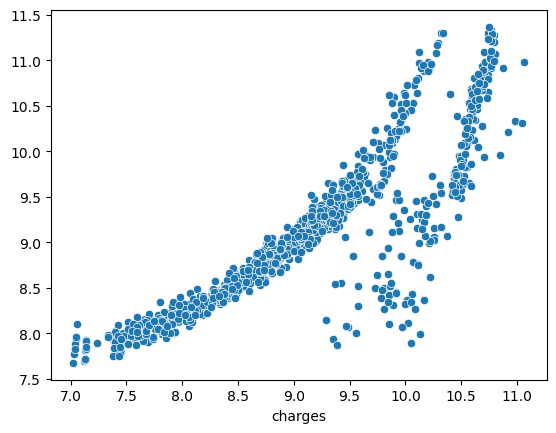

In [99]:
sns.scatterplot(x=y_log_train,y=prediction_log_train)

<Axes: xlabel='charges'>

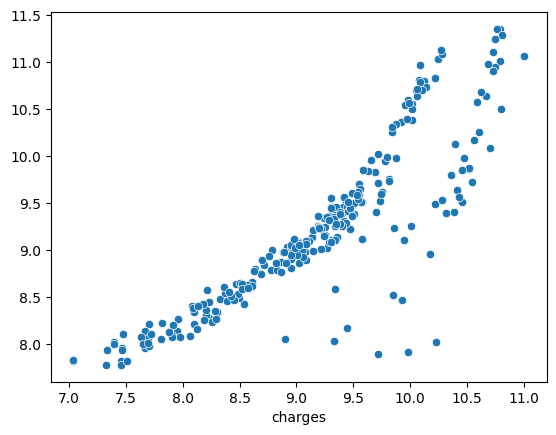

In [100]:
sns.scatterplot(x=y_log_test,y=prediction_log_test)